In [275]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Here is the function used to download stock price and save it locally on my drive (for later use)
#with the help of yfinance, stock prices are downloaded and stored in dataframe format
#Ticker used: S&P500
#Data window: from 1-1-2015 till now

def download_new_ticker(ticker):
    start_date = "2015-1-1"
    ticker_price_download = yf.download(ticker, start=start_date)
    ticker_df = pd.DataFrame(ticker_price_download.values, 
                             index=ticker_price_download.index, 
                             columns=ticker_price_download.columns.get_level_values(0))
    if len(ticker_df) == 0:
        print("ticker not found / downloaded")
    else:
        ticker_df.to_csv('data/price/' + ticker + '.csv')
    print(ticker_df)

download_new_ticker("^GSPC")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21412\2615205177.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_price_download = yf.download(ticker, start=start_date)
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open        Volume
Date                                                                        
2015-01-02  2058.199951  2072.360107  2046.040039  2058.899902  2.708700e+09
2015-01-05  2020.579956  2054.439941  2017.339966  2054.439941  3.799120e+09
2015-01-06  2002.609985  2030.250000  1992.439941  2022.150024  4.460110e+09
2015-01-07  2025.900024  2029.609985  2005.550049  2005.550049  3.805480e+09
2015-01-08  2062.139893  2064.080078  2030.609985  2030.609985  3.934010e+09
...                 ...          ...          ...          ...           ...
2025-11-24  6705.120117  6715.750000  6630.700195  6636.540039  6.039740e+09
2025-11-25  6765.879883  6776.399902  6659.979980  6697.029785  5.003330e+09
2025-11-26  6812.609863  6831.439941  6783.870117  6793.549805  4.485000e+09
2025-11-28  6849.089844  6850.859863  6819.750000  6822.520020  2.558540e+09
2025-12-01  6812.629883  6843.649902  6799.939941  6812.299805  4.549370e+09

In [ ]:
#Get downloaded data from local drive
sp500_file = pd.read_csv('data/price/^GSPC.csv')
sp500_file["Date"] = pd.to_datetime(sp500_file["Date"])
sp500_file

,Date,Close,High,Low,Open,Volume
0,2015-01-02,2058.199951,2072.360107,2046.040039,2058.899902,2.708700e+09
1,2015-01-05,2020.579956,2054.439941,2017.339966,2054.439941,3.799120e+09
2,2015-01-06,2002.609985,2030.250000,1992.439941,2022.150024,4.460110e+09
3,2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3.805480e+09
4,2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3.934010e+09
...,...,...,...,...,...,...
2740,2025-11-24,6705.120117,6715.750000,6630.700195,6636.540039,6.039740e+09
2741,2025-11-25,6765.879883,6776.399902,6659.979980,6697.029785,5.003330e+09
2742,2025-11-26,6812.609863,6831.439941,6783.870117,6793.549805,4.485000e+09
2743,2025-11-28,6849.089844,6850.859863,6819.750000,6822.520020,2.558540e+09


In [ ]:
#"Year-Month" column is created for later month grouping
sp500_file["Year-Month"] = sp500_file.apply(lambda row: str(row["Date"].year) + '-' + str(row["Date"].month), axis=1)
sp500_file

,Date,Close,High,Low,Open,Volume,Year-Month
0,2015-01-02,2058.199951,2072.360107,2046.040039,2058.899902,2.708700e+09,2015-1
1,2015-01-05,2020.579956,2054.439941,2017.339966,2054.439941,3.799120e+09,2015-1
2,2015-01-06,2002.609985,2030.250000,1992.439941,2022.150024,4.460110e+09,2015-1
3,2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3.805480e+09,2015-1
4,2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3.934010e+09,2015-1
...,...,...,...,...,...,...,...
2740,2025-11-24,6705.120117,6715.750000,6630.700195,6636.540039,6.039740e+09,2025-11
2741,2025-11-25,6765.879883,6776.399902,6659.979980,6697.029785,5.003330e+09,2025-11
2742,2025-11-26,6812.609863,6831.439941,6783.870117,6793.549805,4.485000e+09,2025-11
2743,2025-11-28,6849.089844,6850.859863,6819.750000,6822.520020,2.558540e+09,2025-11


In [ ]:
#I want to find the median / min index within the Year-Month, based on that we will know on which date the Buy action will be executed.
sp500_file["Index"] = sp500_file.index
sp500_file

,Date,Close,High,Low,Open,Volume,Year-Month,Index
0,2015-01-02,2058.199951,2072.360107,2046.040039,2058.899902,2.708700e+09,2015-1,0
1,2015-01-05,2020.579956,2054.439941,2017.339966,2054.439941,3.799120e+09,2015-1,1
2,2015-01-06,2002.609985,2030.250000,1992.439941,2022.150024,4.460110e+09,2015-1,2
3,2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3.805480e+09,2015-1,3
4,2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3.934010e+09,2015-1,4
...,...,...,...,...,...,...,...,...
2740,2025-11-24,6705.120117,6715.750000,6630.700195,6636.540039,6.039740e+09,2025-11,2740
2741,2025-11-25,6765.879883,6776.399902,6659.979980,6697.029785,5.003330e+09,2025-11,2741
2742,2025-11-26,6812.609863,6831.439941,6783.870117,6793.549805,4.485000e+09,2025-11,2742
2743,2025-11-28,6849.089844,6850.859863,6819.750000,6822.520020,2.558540e+09,2025-11,2743


In [263]:
#Groupby Year-Month and find the median value of the index.
#I put the Roundup function here, because if the number of elements in the Year-Month group is even (for example 9.5 which is not a real index), the next index will be taken (10 for example) 
median_index = round(sp500_file[["Index", "Year-Month"]].groupby("Year-Month").median())
median_index = median_index.sort_values(by=["Index"], ascending=True)
median_index
#Below is the list of index we need to look up in the main dataframe (sp500_file) in order to know on which date the Buy shall be executed

,Index
Year-Month,
2015-1,10.0
2015-2,29.0
2015-3,50.0
2015-4,71.0
2015-5,92.0
...,...
2025-8,2670.0
2025-9,2691.0
2025-10,2713.0


In [ ]:
#For example, in the first 3 months in 2015, the Saving Plan will execute Buy in the following dates with respective Close prices.
sp500_file.loc[[10,29,50], ["Date","Close"]]

,Date,Close
10,2015-01-16,2019.420044
29,2015-02-13,2096.989990
50,2015-03-17,2074.280029


In [ ]:
#Saving plan setup: 
# installment_amount = 100 Euro per each deposit / Buy
# Close price is used
# Total Deposit = accumulative amount of deposits till date
# Portfolio Value = market value of the portfolio till date
saving_plan1 = pd.DataFrame(columns=["Buy Date", "Buy Price", "Buy Quantity", "Total Quantity", "Buy Value", "Total Deposit","Average Buy Price", "Portfolio Value"])
installment_amount = 100
total_quantity = 0
total_deposit = 0

for i in median_index["Index"]:
    buy_date = sp500_file.loc[i, "Date"]
    buy_price = sp500_file.loc[i, "Close"]
    buy_quantity = installment_amount / buy_price
    total_quantity += buy_quantity
    total_deposit += installment_amount

    dct = {"Buy Date": [buy_date],
      "Buy Price": [buy_price], 
      "Buy Quantity": [buy_quantity],
      "Total Quantity": [total_quantity],
      "Buy Value": [buy_price * buy_quantity],
      "Total Deposit": [total_deposit],
      "Average Buy Price": [total_deposit / total_quantity],
      "Portfolio Value": [buy_price * total_quantity]
      }
    
    saving_plan1 = pd.concat([saving_plan1, pd.DataFrame(data=dct)], ignore_index=True)
    
saving_plan1


,Buy Date,Buy Price,Buy Quantity,Total Quantity,Buy Value,Total Deposit,Average Buy Price,Portfolio Value
0,2015-01-16,2019.420044,0.049519,0.049519,100.0,100,2019.420044,100.000000
1,2015-02-13,2096.989990,0.047687,0.097207,100.0,200,2057.474150,203.841199
2,2015-03-17,2074.280029,0.048209,0.145416,100.0,300,2063.045770,301.633642
3,2015-04-16,2104.989990,0.047506,0.192922,100.0,400,2073.374331,406.099364
4,2015-05-15,2122.729980,0.047109,0.240031,100.0,500,2083.060992,509.521802
...,...,...,...,...,...,...,...,...
127,2025-08-15,6449.799805,0.015504,4.085266,100.0,12800,3133.210976,26349.147291
128,2025-09-16,6606.759766,0.015136,4.100402,100.0,12900,3146.033055,27090.370469
129,2025-10-16,6629.069824,0.015085,4.115487,100.0,13000,3158.799919,27281.850677
130,2025-11-14,6734.109863,0.014850,4.130337,100.0,13100,3171.654208,27814.141592


In [ ]:
#Add columns for Return on Investment in € and %
saving_plan1["+/- €"] = saving_plan1["Portfolio Value"] - saving_plan1["Total Deposit"]
saving_plan1["+/- %"] = saving_plan1["+/- €"] / saving_plan1["Total Deposit"]
saving_plan1

,Buy Date,Buy Price,Buy Quantity,Total Quantity,Buy Value,Total Deposit,Average Buy Price,Portfolio Value,+/- €,+/- %
0,2015-01-16,2019.420044,0.049519,0.049519,100.0,100,2019.420044,100.000000,0.0,0.0
1,2015-02-13,2096.989990,0.047687,0.097207,100.0,200,2057.474150,203.841199,3.841199,0.019206
2,2015-03-17,2074.280029,0.048209,0.145416,100.0,300,2063.045770,301.633642,1.633642,0.005445
3,2015-04-16,2104.989990,0.047506,0.192922,100.0,400,2073.374331,406.099364,6.099364,0.015248
4,2015-05-15,2122.729980,0.047109,0.240031,100.0,500,2083.060992,509.521802,9.521802,0.019044
...,...,...,...,...,...,...,...,...,...,...
127,2025-08-15,6449.799805,0.015504,4.085266,100.0,12800,3133.210976,26349.147291,13549.147291,1.058527
128,2025-09-16,6606.759766,0.015136,4.100402,100.0,12900,3146.033055,27090.370469,14190.370469,1.100029
129,2025-10-16,6629.069824,0.015085,4.115487,100.0,13000,3158.799919,27281.850677,14281.850677,1.098604
130,2025-11-14,6734.109863,0.014850,4.130337,100.0,13100,3171.654208,27814.141592,14714.141592,1.123217


<Axes: xlabel='Buy Date'>

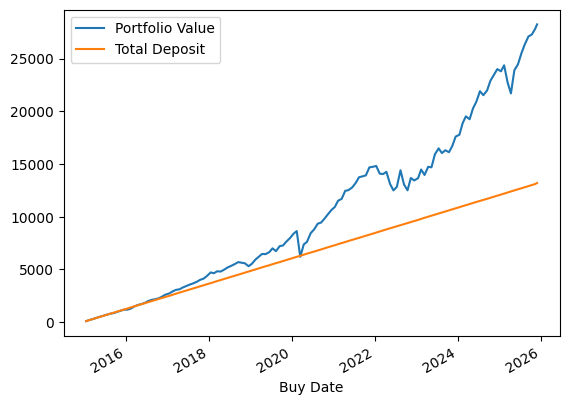

In [283]:
#Plot Total Deposit and Portfolio Value over the course of the saving plan
plot_df = pd.DataFrame(saving_plan1[["Portfolio Value", "Total Deposit", "+/- %", "Buy Date"]])
ax = plot_df.plot(x="Buy Date", y=["Portfolio Value", "Total Deposit"])
ax

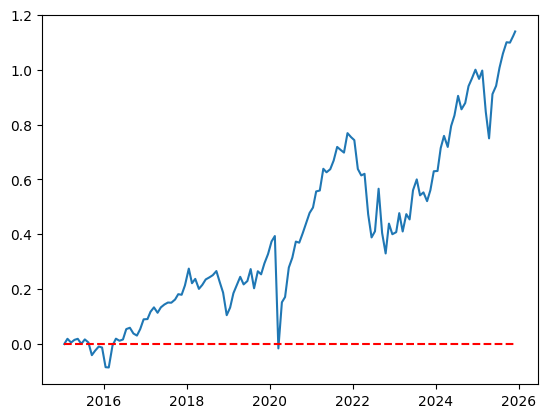

In [ ]:
fig, ax = plt.subplots()
ax.plot(plot_df["Buy Date"], plot_df["+/- %"])
ax.hlines(y=0, xmin=plot_df["Buy Date"].min(), xmax=plot_df["Buy Date"].max(), linestyles ='--', colors="r")
plt.show()
#Comments on this strategy
#This saving plan shows a strong performance over the course of 11-year investment with roughly 114% ROI ~ over 10% ROI per year. Especially, this is a passive investment strategy, which requires almost zero research effort.
#Although there were a few sharp downturns in the past like:
# - Early 2016: Chinese market crash
# - Early 2020: Corona crisis ==> brought it to under break-even point after 5 years of investing
# - 2022-2023: war between Russia and Ukraine
# - April 2025: Market turmoil triggered by fears of a full-blown trade war
# ==> this strategy still shows an amazing and acceptable performance (comparing to bank interest rate / inflation rate))

In [ ]:
min_index = round(sp500_file[["Index", "Year-Month"]].groupby("Year-Month").min())
min_index = min_index.sort_values(by=["Index"], ascending=True)
min_index

In [ ]:
concat_index = pd.concat([min_index, median_index]).sort_values(by=["Index"])
concat_index

In [252]:
saving_plan2 = pd.DataFrame(columns=["Buy Date", "Buy Price", "Buy Quantity", "Total Quantity", "Buy Value", "Total Deposit","Average Buy Price", "Portfolio Value"])
installment_amount = 100
total_quantity = 0
total_deposit = 0

for i in concat_index["Index"]:
    buy_date = sp500_file.loc[i, "Date"]
    buy_price = sp500_file.loc[i, "Close"]
    buy_quantity = installment_amount / buy_price
    total_quantity += buy_quantity
    total_deposit += installment_amount

    dct = {"Buy Date": [buy_date],
      "Buy Price": [buy_price], 
      "Buy Quantity": [buy_quantity],
      "Total Quantity": [total_quantity],
      "Buy Value": [buy_price * buy_quantity],
      "Total Deposit": [total_deposit],
      "Average Buy Price": [total_deposit / total_quantity],
      "Portfolio Value": [buy_price * total_quantity]
      }
    
    saving_plan2 = pd.concat([saving_plan2, pd.DataFrame(data=dct)], ignore_index=True)
    
saving_plan2


,Buy Date,Buy Price,Buy Quantity,Total Quantity,Buy Value,Total Deposit,Average Buy Price,Portfolio Value
0,2015-01-02,2058.199951,0.048586,0.048586,100.0,100,2058.199951,100.000000
1,2015-01-16,2019.420044,0.049519,0.098105,100.0,200,2038.625591,198.115834
2,2015-02-02,2020.849976,0.049484,0.147589,100.0,300,2032.665741,298.256118
3,2015-02-13,2096.989990,0.047687,0.195277,100.0,400,2048.373985,409.493580
4,2015-03-02,2117.389893,0.047228,0.242505,100.0,500,2061.814875,513.477208
...,...,...,...,...,...,...,...,...
259,2025-10-16,6629.069824,0.015085,8.252437,100.0,26000,3150.584435,54705.982008
260,2025-11-03,6851.970215,0.014594,8.267031,100.0,26100,3157.118739,56645.453470
261,2025-11-14,6734.109863,0.014850,8.281881,100.0,26200,3163.532439,55771.098233
262,2025-12-01,6812.629883,0.014679,8.296560,100.0,26300,3169.988574,56521.391711
